# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
#
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
#
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Import csv

In [2]:
data = pd.read_csv("../../tresboncoin/data/master_with_fuzzy_and_cleaning.csv")

# Exploring data

## Basic exploration

In [3]:
data.head()

,url,uniq_id,brand,model,brand_db,model_db,type_db,category_db,bike_year,mileage,price
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,versys10002020,kawasaki,versys1000,motorcycle,street,2021,476.0,16999.0
1,https://www.motoplanete.com/occasion-moto/2127...,motoplanete-21278,yamaha,wildstar,yamaha,roadstar,motorcycle,street,2003,5130.0,3700.0
2,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,niken,yamaha,niken,motorcycle,street,2019,2500.0,13490.0
3,https://www.motoplanete.com/occasion-moto/3925...,motoplanete-39257,honda,cb650f,honda,cb650f,motorcycle,street,2018,19226.0,5590.0
4,https://www.motoplanete.com/occasion-moto/3969...,motoplanete-39690,kawasaki,zr7s,kawasaki,zr7s,motorcycle,street,2004,47000.0,2790.0


## Duplicates

In [4]:
size_before = len(data)
data = data.drop_duplicates()
size_after = len(data)
print(str(size_before - size_after) + " duplicates were removed.")

141 duplicates were removed.


## Missing

In [5]:
100 * data.isnull().sum().sort_values(ascending=False)/len(data)

brand_db       11.65987
model_db       11.65987
type_db        11.65987
category_db    11.65987
url             0.00000
uniq_id         0.00000
brand           0.00000
model           0.00000
bike_year       0.00000
mileage         0.00000
price           0.00000
dtype: float64

Input most frequent for <i style="color:orangered">brand</i>, <i style="color:orangered">model</i>, <i style="color:orangered">bike_type</i> features<br/>
Input mean for <i style="color:orangered">mileage</i>

## Distribution and outliers

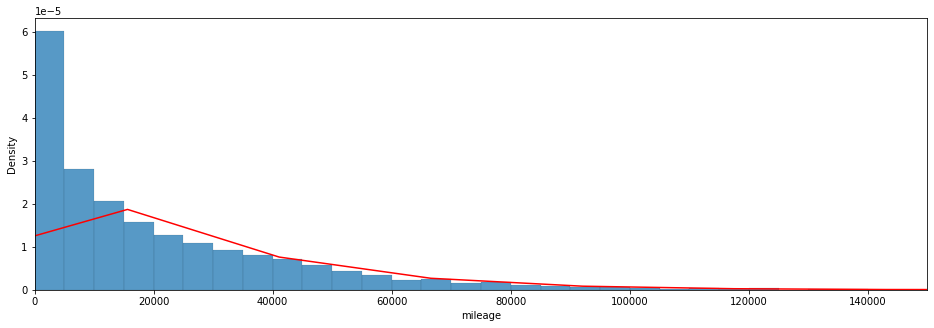

In [6]:
fig = plt.figure(figsize=(16, 5))
sns.histplot(data["mileage"], palette='Blues', stat='density', bins=1000)
sns.kdeplot(data["mileage"], color='red')
plt.xlim(0, 150000);

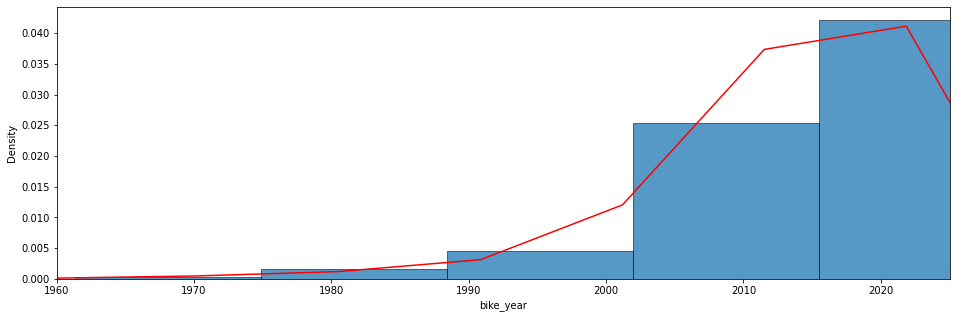

In [7]:
fig = plt.figure(figsize=(16, 5))
sns.histplot(data["bike_year"], palette='Blues', stat='density', bins=150)
sns.kdeplot(data["bike_year"], color='red')
plt.xlim(1960, 2025);

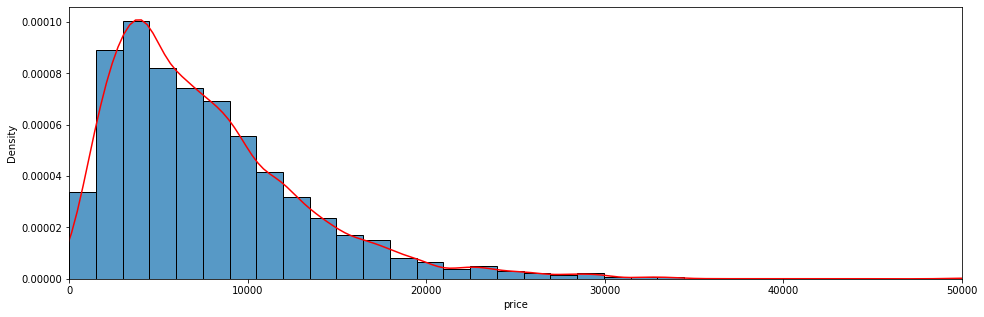

In [8]:
fig = plt.figure(figsize=(16, 5))
sns.histplot(data["price"], palette='Blues', stat='density', bins=40)
sns.kdeplot(data["price"], color='red')
plt.xlim(0, 50000);

(0.0, 75000.0)

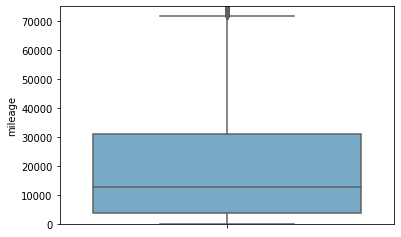

In [9]:
sns.boxplot(y=data["mileage"], palette="Blues");
plt.ylim(0, 75000)

(1960.0, 2022.0)

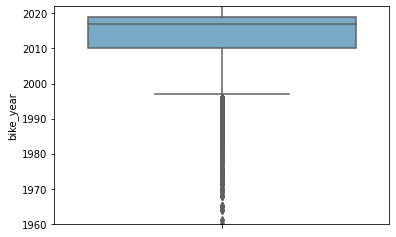

In [10]:
sns.boxplot(y=data["bike_year"], palette="Blues");
plt.ylim(1960, 2022)

(0.0, 50000.0)

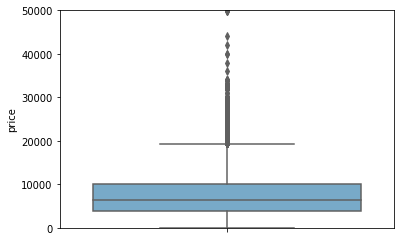

In [11]:
sns.boxplot(y=data["price"], palette="Blues");
plt.ylim(0, 50000)

# Cleaning

In [12]:
# TODO

In [13]:
data.columns

Index(['url', 'uniq_id', 'brand', 'model', 'brand_db', 'model_db', 'type_db',
       'category_db', 'bike_year', 'mileage', 'price'],
      dtype='object')

In [14]:
data.shape

(13242, 11)

In [15]:
data = data[(data["bike_year"]>=1970) & (data["bike_year"]<=2022)]
data = data[(data["mileage"]>=1000) & (data["mileage"]<=80000)]
data = data[(data["price"]>=1000) & (data["price"]<30000)]

In [16]:
data.shape

(11207, 11)


# Preparing model inputs

In [17]:
data.columns

Index(['url', 'uniq_id', 'brand', 'model', 'brand_db', 'model_db', 'type_db',
       'category_db', 'bike_year', 'mileage', 'price'],
      dtype='object')

In [19]:
#data["bike_type"] = data["bike_type"].apply(lambda x: str(x).lower().replace("è", "e").replace("& gt", "").strip())

In [20]:
#data["bike_type"].unique()

In [21]:
#data["bike_type"] = data["bike_type"].apply(lambda x: "quad" if x.find("quad")>=0 else x)
#data["bike_type"] = data["bike_type"].apply(lambda x: "supermotard" if x.find("super")>=0 else x)
#X_train["bike_type"] = X_train["bike_type"].apply(lambda x: "Custom" if x=="TRAIL-SUPERMOTARD" else x)
data["category_db"].value_counts()

street         7657
scooter        1585
dual sport      401
off-road        325
Name: category_db, dtype: int64

In [22]:
nans_bikes = ["3 roues", "side car", "trike", "moto 125", "nan", "mini moto", "véhicules utilitaires", 
              "vélomoteur", "motoneige", "autres motos", "custom", "supermotard", "enduro", "collection",
              "cross", "quad", "trial", "pocket bike", "coupé", "routiere gt"]

In [23]:
#data["bike_type"] = data["bike_type"].apply(lambda x: np.nan if x in nans_bikes else x)

In [24]:
#data["bike_type"].value_counts()

/Users/victor/.pyenv/versions/3.9.1/envs/tresboncoin/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


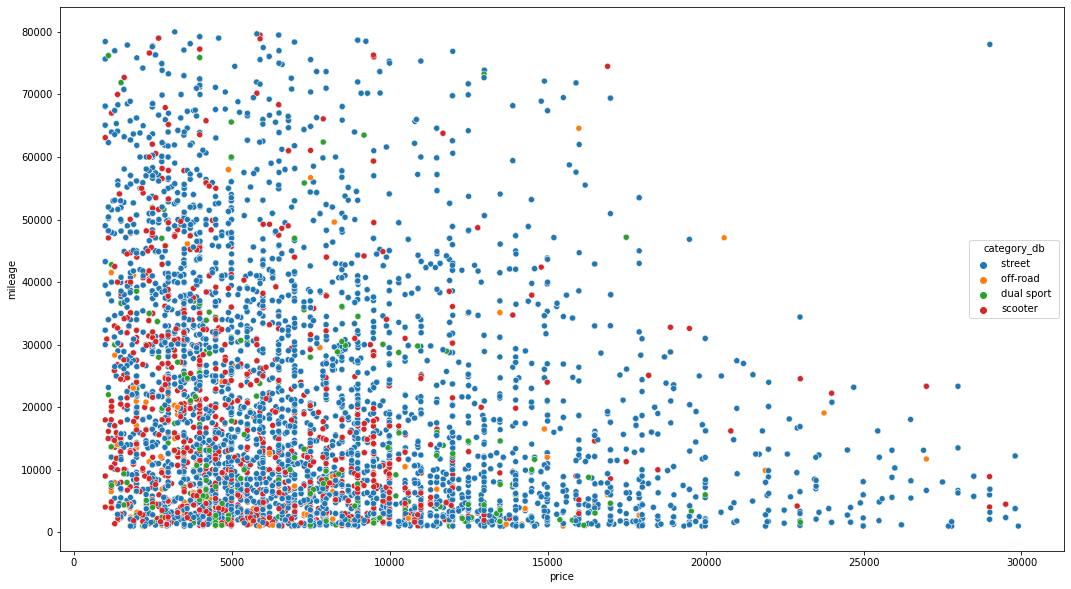

In [26]:
fig = plt.figure(figsize=(18,10))
sns.scatterplot(data["price"], data["mileage"] , hue=data["category_db"]);

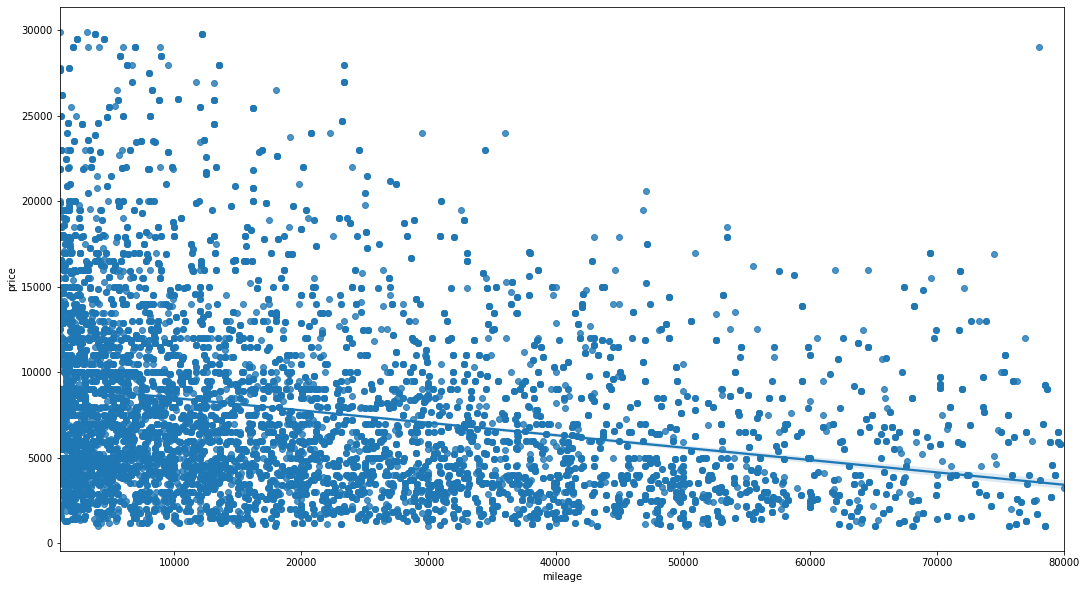

In [27]:
fig = plt.figure(figsize=(18,10))
sns.regplot(x="mileage", y="price", data=data);

In [29]:
data.columns

Index(['url', 'uniq_id', 'brand', 'model', 'brand_db', 'model_db', 'type_db',
       'category_db', 'bike_year', 'mileage', 'price'],
      dtype='object')

In [112]:
X_train = data.drop(["price", 'url', 'uniq_id', 'model_db', "type_db", 'brand', "model", "brand_db"], axis=1)#, 'brand', 'model'], axis=1)
y_train = data["price"]

In [131]:
from datetime import datetime
def km_per_year(km, bike_year):
    if (datetime.now().year- bike_year) == 0:
        return km
    return km / (datetime.now().year- bike_year)
X_train['km/year'] = X_train.apply(lambda x: km_per_year(x['mileage'],x['bike_year']), axis=1)

In [132]:
X_train.head()

,category_db,bike_year,mileage,km/year
1,street,2003,5130.0,285.000000
2,street,2019,2500.0,1250.000000
3,street,2018,19226.0,6408.666667
4,street,2004,47000.0,2764.705882
5,street,2009,20000.0,1666.666667


In [115]:
#list_brands_to_keep = list(X_train["brand_db"].value_counts()[0:6].index)

In [116]:
#X_train_test = X_train[X_train["brand_db"].isin(list_brands_to_keep)]
#X_train_test["brand_db"].value_counts()

# Imputers

In [133]:
imputer_numeric = SimpleImputer(strategy='mean')
imputer_textual = SimpleImputer(strategy='most_frequent')

In [134]:
#X_train["brand_db"] = imputer_textual.fit_transform(X_train["brand_db"].values.reshape(-1, 1))
X_train["category_db"] = imputer_textual.fit_transform(X_train["category_db"].values.reshape(-1, 1))
#X_train["bike_type"] = imputer_textual.fit_transform(X_train["bike_type"].values.reshape(-1, 1))
X_train["mileage"] = imputer_numeric.fit_transform(X_train["mileage"].values.reshape(-1, 1))

In [135]:
100 * X_train.isnull().sum().sort_values(ascending=False)/len(data)

category_db    0.0
bike_year      0.0
mileage        0.0
km/year        0.0
dtype: float64

# Encoder

In [136]:
df = X_train.copy()

In [137]:
feat = "brand_db"
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[[feat]])
col = list(ohe.get_feature_names([feat])) # here feat will be the prefix
df[col] = ohe.transform(df[[feat]])
df.drop(columns=feat, inplace = True) # drop initial column

KeyError: "None of [Index(['brand_db'], dtype='object')] are in the [columns]"

In [138]:
#feat = "model"
#ohe = OneHotEncoder(sparse=False)
#ohe.fit(df[[feat]])
#col = list(ohe.get_feature_names([feat])) # here feat will be the prefix
#df[col] = ohe.transform(df[[feat]])
#df.drop(columns=feat, inplace = True) # drop initial column

In [139]:
feat = "category_db"
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[[feat]])
col = list(ohe.get_feature_names([feat])) # here feat will be the prefix
df[col] = ohe.transform(df[[feat]])
df.drop(columns=feat, inplace = True) # drop initial column

In [140]:
df.head()

,bike_year,mileage,km/year,category_db_dual sport,category_db_off-road,category_db_scooter,category_db_street
1,2003,5130.0,285.000000,0.0,0.0,0.0,1.0
2,2019,2500.0,1250.000000,0.0,0.0,0.0,1.0
3,2018,19226.0,6408.666667,0.0,0.0,0.0,1.0
4,2004,47000.0,2764.705882,0.0,0.0,0.0,1.0
5,2009,20000.0,1666.666667,0.0,0.0,0.0,1.0


# Scalers

In [215]:
scaler = RobustScaler()

In [216]:
df_scaled = scaler.fit_transform(df)

# Training

In [143]:
def custom_rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))
#
rmse = make_scorer(custom_rmse, greater_is_better=False)

In [144]:
y_train.mean()

7717.066208619613

## Test gradient boosting regressor

In [90]:
model_GBR = GradientBoostingRegressor()

In [ ]:
baseline = cross_validate(model_GBR,
                          df_scaled,
                          y_train,
                          scoring=rmse,
                          cv=15)
baseline = -round(baseline["test_score"].mean(), 3)
baseline

## Test Random forest regressor

In [153]:
model_RFR = RandomForestRegressor()

In [154]:
baseline_RFR = cross_validate(model_RFR,
                              df_scaled,
                              y_train,
                              #scoring=rmse,
                              cv=5)
baseline_RFR = -round(baseline_RFR["test_score"].mean(), 3)
baseline_RFR

-0.579

In [125]:
grid_RFR = {'n_estimators': stats.randint(1, 500),
            'max_depth': stats.randint(1, 500),
            "criterion": ["mse"]
            }

search_RFR = RandomizedSearchCV(model_RFR,
                                grid_RFR,
                                scoring=rmse,
                                n_iter=10,
                                cv=2,
                                n_jobs=-1,
                                verbose=True)

search_RFR.fit(df_scaled, y_train);

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [126]:
search_RFR.best_params_

{'criterion': 'mse', 'max_depth': 344, 'n_estimators': 426}

In [127]:
search_RFR.best_estimator_ #RandomForestRegressor(max_depth=275, n_estimators=302)

RandomForestRegressor(max_depth=344, n_estimators=426)

In [128]:
tuned_RFR = cross_validate(search_RFR.best_estimator_,
                           df_scaled,
                           y_train,
                           scoring=rmse,
                           cv=5)
tuned_RFR = -round(tuned_RFR["test_score"].mean(), 3)
tuned_RFR

2612.349

## SVR

In [411]:
model_SVR = SVR()

In [412]:
baseline_SVR = cross_validate(model_SVR,
                              df_scaled,
                              y_train,
                              scoring=rmse,
                              cv=5)
baseline_SVR = -round(baseline_SVR["test_score"].mean(), 3)
baseline_SVR

4960.06

## Decision Tree

In [155]:
from sklearn import tree
model_TREE = tree.DecisionTreeRegressor()

In [157]:
baseline_TREE = cross_validate(model_TREE,
                               df_scaled,
                               y_train,
                               #scoring=rmse,
                               cv=5)
baseline_TREE = -round(baseline_TREE["test_score"].mean(), 3)
baseline_TREE

-0.502

### Prediction test

In [534]:
model_TREE = tree.DecisionTreeRegressor()
model_TREE.fit(df_scaled, y_train)
new_moto = pd.DataFrame({"bike_year":[2020],
                         "mileage":[10000],
                         "bike_type_collection":[0],
                         "bike_type_cross":[0],
                         #"bike_type_custom":[0],
                         #"bike_type_enduro":[0],
                         #"bike_type_quad":[0],
                         "bike_type_roadster":[0],
                         "bike_type_routiere":[0],
                         "bike_type_scooter":[0],
                         "bike_type_sportive":[0],
                         #"bike_type_supermotard":[0],
                         "bike_type_trail":[1],
                         #"bike_type_trial":[0]
                        })
new_moto_scaled = scaler.fit_transform(new_moto)

In [535]:
model_TREE.predict(new_moto_scaled)

array([9440.])

In [536]:
grid_TREE = {'min_samples_split': stats.randint(1, 500),
             'max_depth': stats.randint(1, 500),
             "criterion": ["mse", "friedman_mse"],
             "min_samples_leaf": stats.loguniform(0.01, 20)
             }

search_TREE = RandomizedSearchCV(model_TREE,
                                 grid_TREE,
                                 scoring=rmse,
                                 n_iter=100,
                                 cv=30,
                                 n_jobs=-1,
                                 verbose=True)

search_TREE.fit(df_scaled, y_train);

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


/Users/victor/.pyenv/versions/3.9.1/envs/tresboncoin/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [-3562.57343217            nan -3560.03321387            nan
            nan -3547.12521165            nan -3773.94412856
            nan            nan -3763.26642699            nan
            nan -3527.90045908            nan -4414.46807368
            nan -3685.86356163            nan -3549.53695512
            nan -3774.25441309            nan -3525.67504539
 -3736.36164494            nan -3560.03911404            nan
            nan -3576.1120224             nan -3548.6693673
            nan            nan            nan -3627.67632726
            nan -3792.75388709 -4414.46807368            nan
 -4362.60123061            nan            nan            nan
 -4023.13292158            nan -3579.50476726            nan
 -3685.86356163            nan            nan            nan
            nan -3556.95674

In [537]:
search_TREE.best_params_

{'criterion': 'mse',
 'max_depth': 428,
 'min_samples_leaf': 0.010083261086087996,
 'min_samples_split': 7}

In [538]:
search_TREE.best_estimator_

DecisionTreeRegressor(max_depth=428, min_samples_leaf=0.010083261086087996,
                      min_samples_split=7)

In [539]:
tuned_TREE = cross_validate(search_TREE.best_estimator_,
                            df_scaled,
                            y_train,
                            scoring=rmse,
                            cv=200)
tuned_TREE = -round(tuned_TREE["test_score"].mean(), 3)
tuned_TREE

3471.021

## extra tree

In [158]:
model_extraTREE = tree.ExtraTreeRegressor()

In [159]:
baseline_extraTREE = cross_validate(model_extraTREE,
                                    df_scaled,
                                    y_train,
                                    #scoring=rmse,
                                    cv=500)
baseline_extraTREE = -round(baseline_extraTREE["test_score"].mean(), 3)
baseline_extraTREE

-0.496

In [160]:
from sklearn.ensemble import ExtraTreesRegressor
model_Ensemble_extraTREE = ExtraTreesRegressor()

In [265]:
baseline_Ensemble_extraTREE = cross_validate(model_Ensemble_extraTREE,
                                             df_scaled,
                                             y_train,
                                             scoring={"rmse":rmse, "r2": "r2"},
                                             cv=50);
pd.DataFrame({"rmse": [-baseline_Ensemble_extraTREE['test_rmse'].mean()], "r2": [baseline_Ensemble_extraTREE['test_r2'].mean()]})

,rmse,r2
0,3018.191134,0.607113


In [183]:
model_Ensemble_extraTREE = ExtraTreesRegressor()
model_Ensemble_extraTREE.fit(df_scaled, y_train)

ExtraTreesRegressor()

In [243]:
new_moto = pd.DataFrame({"bike_year":[2016],
                         "mileage":[20000],
                         "km/year":[20000],
                         "category_db_dual sport":[0],
                         "category_db_off-road":[0],
                         "category_db_scooter":[1],
                         "category_db_street":[0]
                        })
new_moto_scaled = scaler.transform(new_moto)

In [244]:
model_Ensemble_extraTREE.predict(new_moto_scaled)

array([6979.38])

In [252]:
import joblib
import os
from termcolor import colored
#
def save_model():
    """ Save the model into a .joblib format """
    joblib.dump(model_Ensemble_extraTREE, "model.joblib")
    print(colored("Trained model saved locally", "green"))

In [249]:
save_model()

Trained model saved locally


In [253]:
def get_model():
    return joblib.load(os.path.join(".", "model.joblib"))

In [254]:
loaded_model = get_model()

In [255]:
loaded_model.predict(new_moto_scaled)

array([6979.38])